# Predicting Fuel Economy Using Simple Linear Regression

## Goals
To understand the relationship between vehicle horsepower and fuel economy.
To provide insights that can guide automotive manufacturers in optimizing vehicle design for better fuel efficiency
To develop a reliable predictive model that can be used for future analysis and decision-making.

### The Questions
1) How does horsepower affect fuel economy?
2) Can we create a reliable predictive model for Mileage Per Gallon (MPG) based Vehicle Horse Power (HP)?

### Dataset
The dataset used for this analysis is the **FuelEconomy.csv**, which includes the following variables:
+ Independent Variable (X): Vehicle Horse Power (HP)
+ Dependent Variable (Y): Mileage Per Gallon (MPG)



### 1) Exploratory Data Analysis
a) Data Loading
Import the "FuelEconomy.csv" dataset into the analysis environment.

In [1]:
#!pip install --upgrade seaborn
#!pip install --upgrade pandas

#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset 
df = pd.read_csv('FuelEconomy.csv')

df.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739



b) Conduct data visualization and preliminary analysis to identify trends, patterns, and anomalies within the dataset.

In [3]:
df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


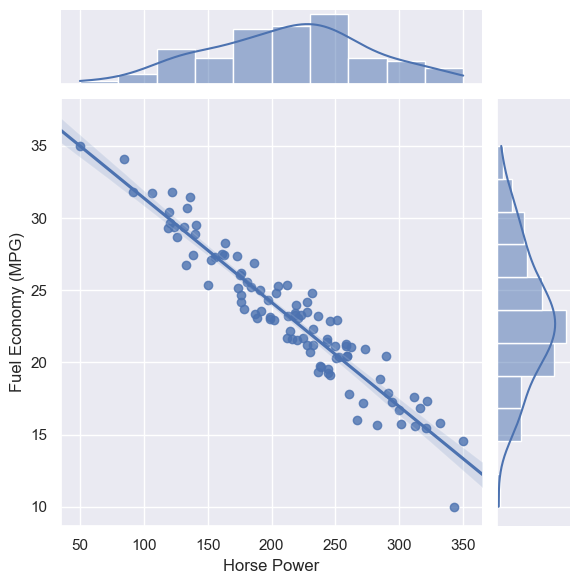

In [5]:
# Visualize data 
sns.set_theme(style='darkgrid')
sns.jointplot(x='Horse Power', y='Fuel Economy (MPG)', data=df, kind='reg', truncate=False)

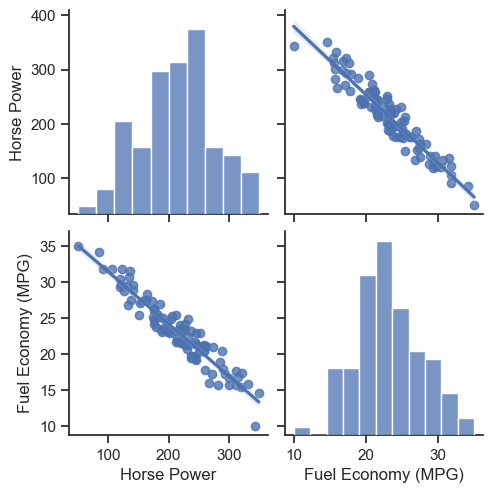

In [6]:
sns.set_theme(style="ticks")
sns.pairplot(df, kind='reg')
plt.show()

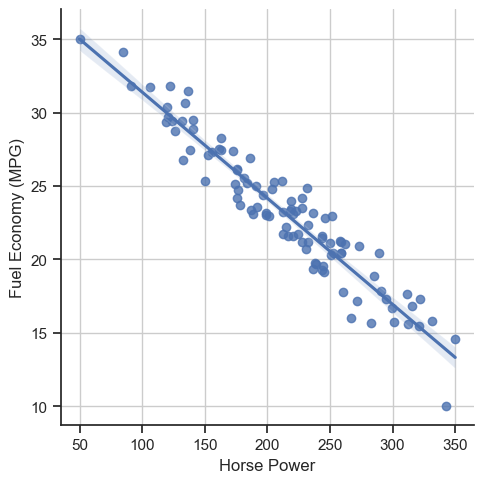

In [7]:
sns.set_theme(style="ticks")
sns.lmplot(x='Horse Power', y='Fuel Economy (MPG)', data=df)
plt.grid()
plt.show()

### 2) Create Testing and Training Dataset
Split the dataset into training (75%) and testing (25%) subsets to facilitate model training and evaluation.

In [8]:
X = df['Horse Power']  # Input to the Model
y = df['Fuel Economy (MPG)']  # Output to the Model


In [9]:
# Convert X and y into arrays
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  

### 3) Model Development
Utilize Scikit-Learn to implement a simple linear regression model that predicts fuel economy based on horsepower.


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Training model 
SimpleLinearRegression = LinearRegression(fit_intercept=True)
SimpleLinearRegression.fit(X_train, y_train)

LinearRegression()

In [12]:
print('Linear Model Coefficient (m):', SimpleLinearRegression.coef_)
print('Linear Model Coefficient (b):', SimpleLinearRegression.intercept_)

Linear Model Coefficient (m): [[-0.07229532]]
Linear Model Coefficient (b): [38.5993938]



### 4) Test Model
Assess the performance of the trained model using relevant metrics to ensure its accuracy and reliability.

In [13]:
y_predict = SimpleLinearRegression.predict(X_test)
y_predict

array([[26.93012894],
       [19.86166233],
       [29.64303774],
       [21.50412106],
       [19.9249096 ],
       [26.82895378],
       [22.13988492],
       [25.50902979],
       [17.56961095],
       [26.78992928],
       [22.79604632],
       [19.75385174],
       [16.94474386],
       [22.4645499 ],
       [20.82772914],
       [25.05775698],
       [23.29237034],
       [19.66871203],
       [21.7943507 ],
       [29.08951457],
       [29.95745299],
       [34.98462786],
       [27.71849666],
       [28.44679495],
       [20.9334295 ]])

In [14]:
y_test

array([[27.54462659],
       [20.46737357],
       [29.3933298 ],
       [19.36733689],
       [21.26177779],
       [27.41866055],
       [21.20598653],
       [25.57508399],
       [17.87326587],
       [28.28951641],
       [23.42673926],
       [17.80270554],
       [16.69336865],
       [23.3071922 ],
       [22.84971109],
       [23.38454579],
       [25.34189228],
       [21.05039889],
       [22.3130506 ],
       [29.39756688],
       [30.39261331],
       [35.        ],
       [25.34563185],
       [28.88208128],
       [19.53677007]])

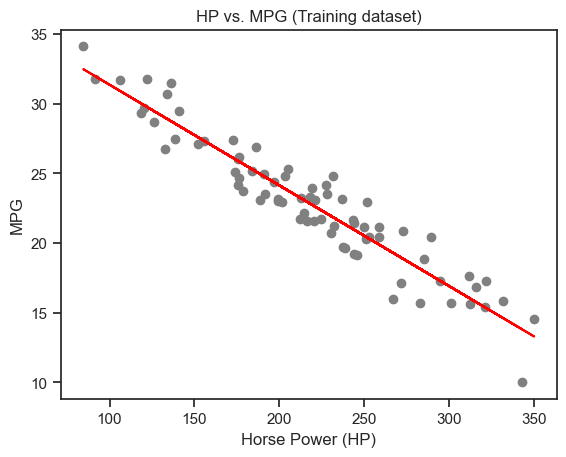

In [15]:
# Visualize Train Set Results
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, SimpleLinearRegression.predict(X_train), color='red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Training dataset)')
plt.show()

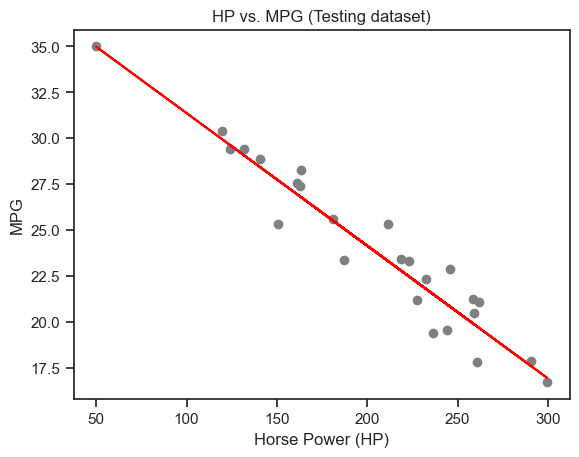

In [16]:

# Visualize Test Set Results
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_predict, color='red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Testing dataset)')
plt.show()

### 5) Model Evaluation and Accuracy Metrics
1R²-Score: The R²-Score, also known as the coefficient of determination, tells us how well our model fits the data. It gives us the proportion of the variance in the dependent variable (MPG) that can be predicted from the independent variable (horsepower). A higher R² indicates a better model fit.

1) ##### R²-Score:

In [17]:
# First way to calculate the coefficient of determination (R²)
# A built-in method of the model that returns the coefficient of determination (R²) based on the test data
accuracy_LinearRegression = SimpleLinearRegression.score(X_test, y_test)
print('Model Accuracy:', accuracy_LinearRegression)
#The model achieved an accuracy of approximately 92%, suggesting it is effective in predicting fuel economy based on horsepower.

Model Accuracy: 0.9266583728561986


In [18]:
# Second way to calculate the coefficient of determination (R²)
# Manually calculates R²  by comparing the true values and predicted values
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_predict)
print('Model Accuracy:', r2)

Model Accuracy: 0.9266583728561986


2) ##### Mean Absolute Error (MAE)
Mean Absolute Error (MAE): The Mean Absolute Error (MAE) is the average of the absolute differences between the predicted and actual values. It is a common metric used to evaluate the accuracy of regression models, where smaller values indicate better performance.

In [21]:
#This metric quantifies the average magnitude of errors. Lower MAE suggests a better model.
mae = np.mean(np.absolute(y_predict - y_test))
print("Mean absolute error: %.2f" % mae)

Mean absolute error: 0.98


3) Root Mean Squared Error (RMSE)
Root Mean Squared Error (RMSE): Root Mean Squared Error (RMSE) is another commonly used metric that can be derived by taking the square root of MSE. This helps bring the error value back to the original units (MPG) and is often easier to interpret.

In [19]:
mse = np.mean((y_predict - y_test) ** 2)
print("Residual sum of squares (MSE): %.2f" % mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse) 

Residual sum of squares (MSE): 1.48


6) ##### Generate the predictions

In [20]:
# Use the trained Model to generate the predictions
HP = np.array([240]).reshape(-1, 1)
MPG = SimpleLinearRegression.predict(HP)
print('Predicted MPG for 240 HP:', MPG)

# The prediction for a vehicle with 240 HP is approximately 21.4 MPG, demonstrating the practical application of the model.

Predicted MPG for 240 HP: [[21.24851728]]
